<a href="https://colab.research.google.com/github/MathGatto/python-analise-de-dados/blob/main/CASE_9_INCENDIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [2]:
BD = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')

BD.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


<Axes: >

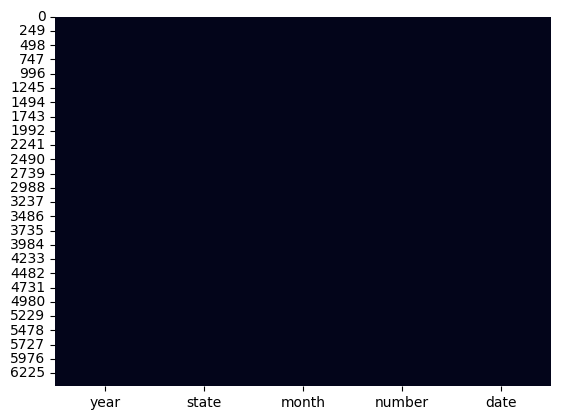

In [3]:
sns.heatmap(BD.isnull(), cbar=False)

In [4]:
BD.shape

(6454, 5)

In [5]:
BD.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [6]:
BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


<Axes: title={'center': 'Analise das Queimadas e seus OUTLIERS'}, xlabel='year', ylabel='number'>

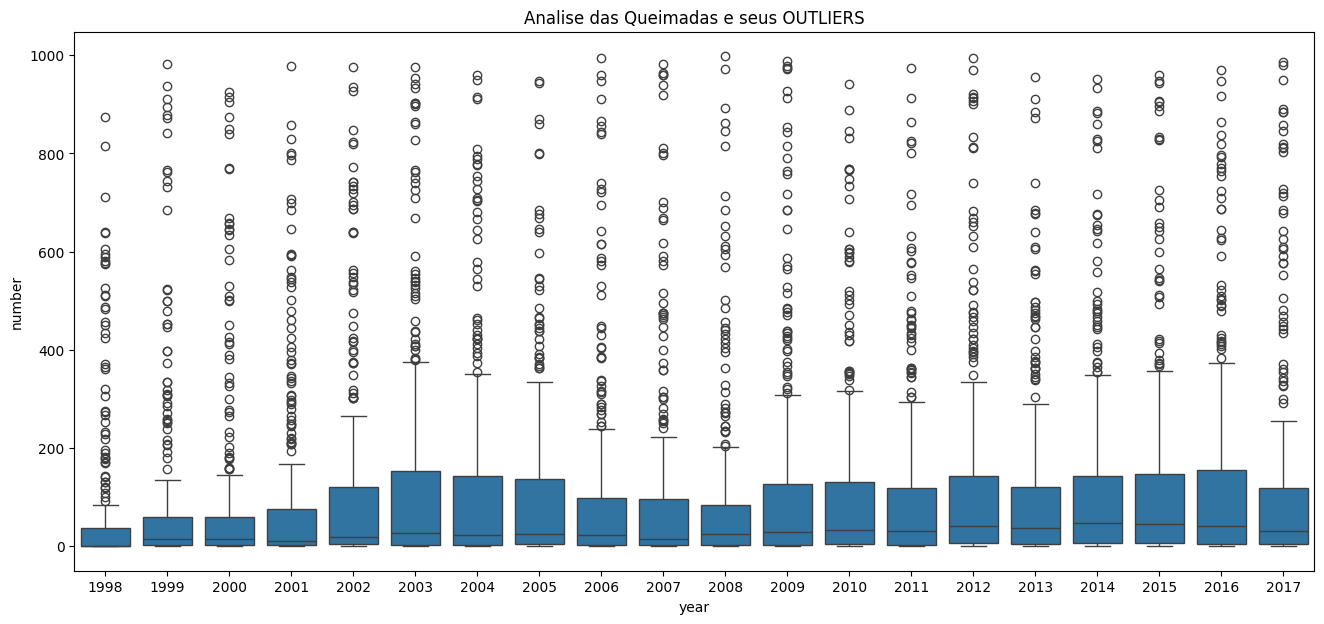

In [7]:
plt.figure(figsize=(16,7))
plt.title('Analise das Queimadas e seus OUTLIERS')
sns.boxplot(data=BD, x='year', y='number')

In [8]:
Analise = BD.groupby(by=['year']).sum().reset_index()

Text(0, 0.5, 'Quantidade')

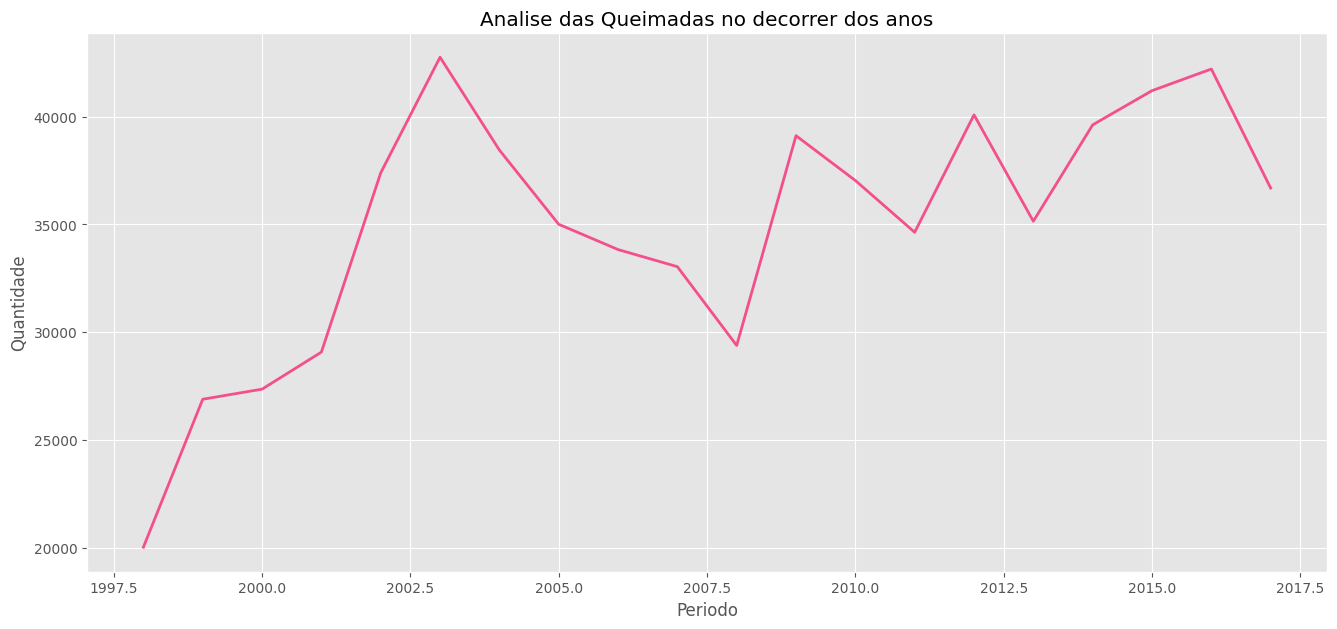

In [9]:
plt.figure(figsize=(16,7))

plt.style.use('ggplot')
plt.title('Analise das Queimadas no decorrer dos anos')

sns.lineplot(data=Analise, x='year', y='number', estimator='sum', lw=2, color='#f53f82', alpha=0.9)

plt.xlabel('Periodo')
plt.ylabel('Quantidade')

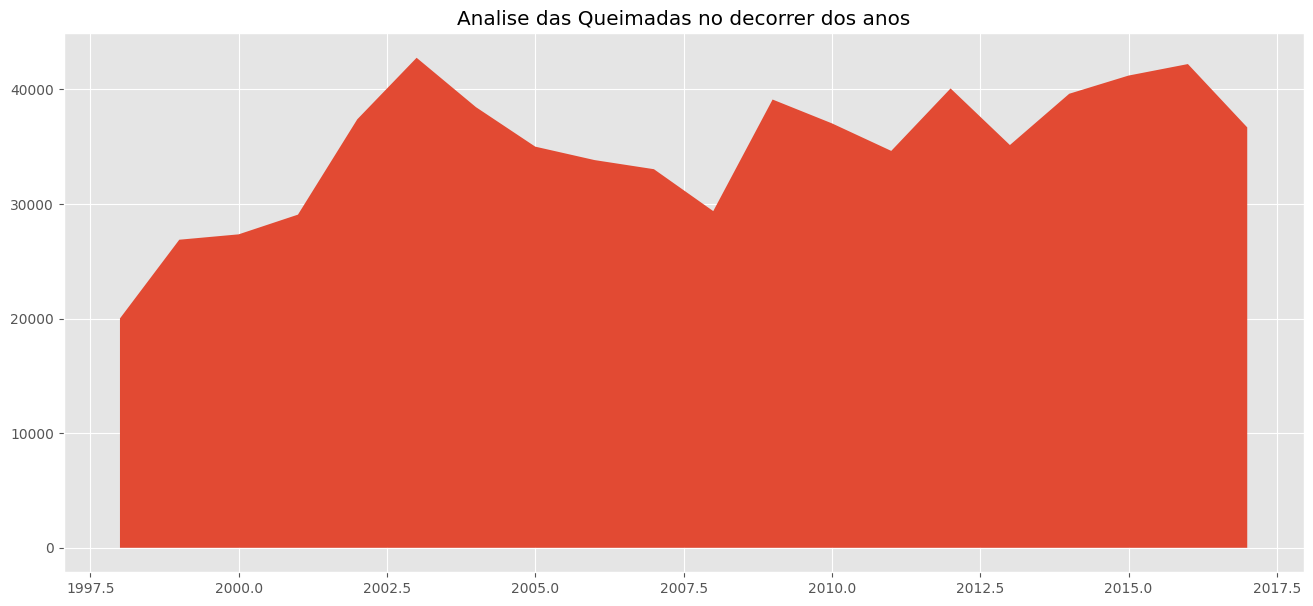

In [10]:
plt.figure(figsize=(16,7))
plt.title('Analise das Queimadas no decorrer dos anos')
plt.fill_between(x=Analise['year'], y1=Analise['number'])

Text(0, 0.5, 'Numero de Incendios')

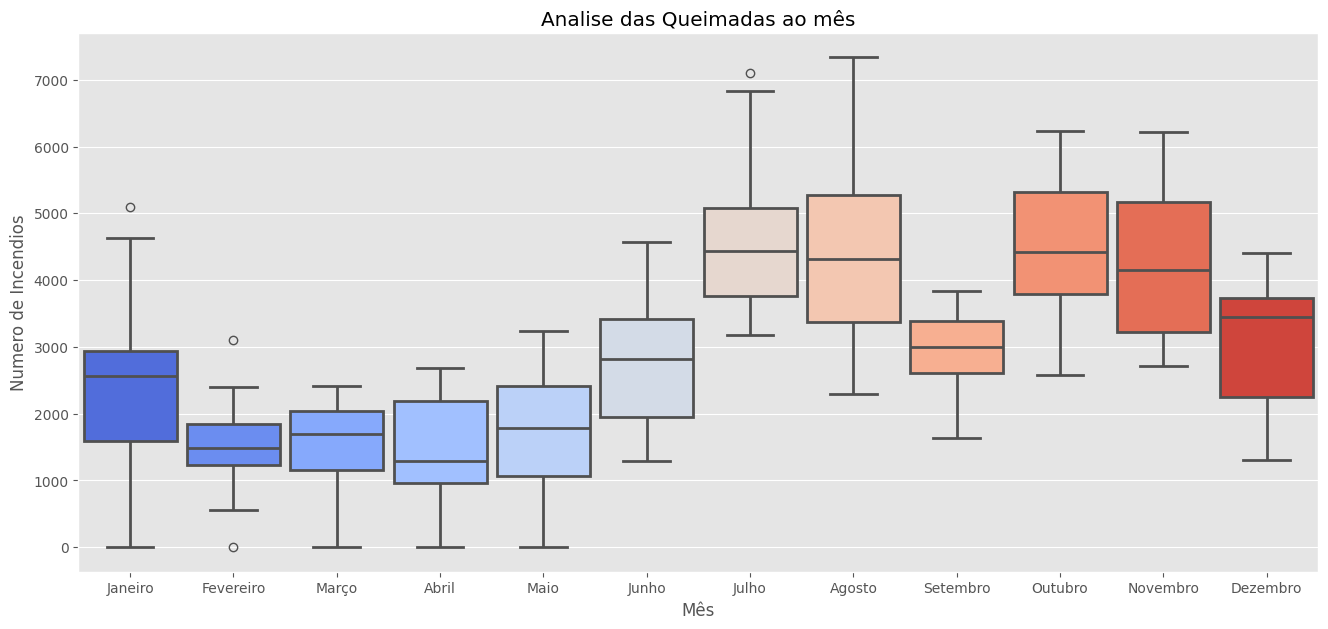

In [11]:
Analise2 = BD.groupby(by=['year', 'month']).sum().reset_index()


plt.figure(figsize=(16,7))
plt.title('Analise das Queimadas ao mês')
sns.boxplot(data=Analise2, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

plt.xlabel('Mês')
plt.ylabel('Numero de Incendios')

Text(0, 0.5, 'Numero de Incendios')

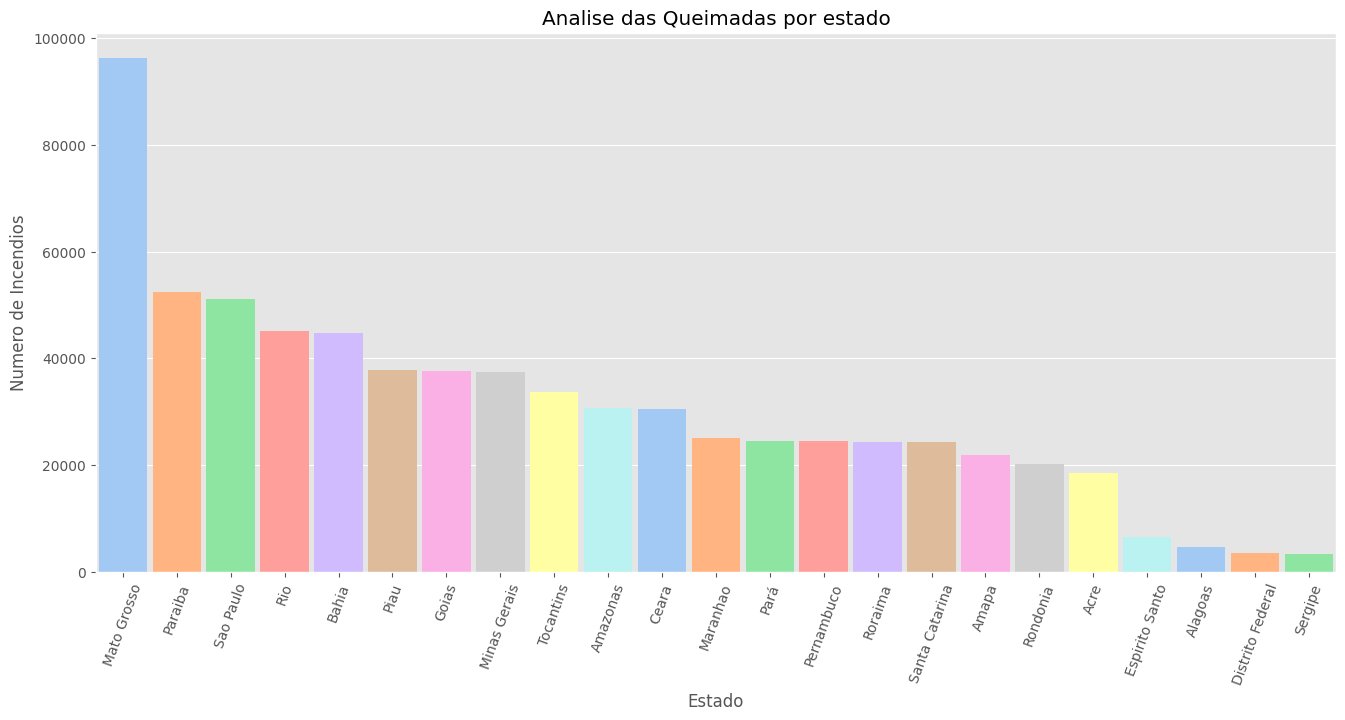

In [12]:
Analise3 = BD.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)

plt.figure(figsize=(16,7))
plt.title('Analise das Queimadas por estado')
sns.barplot(data=Analise3, x='state', y='number', palette='pastel', saturation=2, width=0.9, linewidth=4)

plt.xlabel('Estado')
plt.xticks(rotation=70)
plt.ylabel('Numero de Incendios')

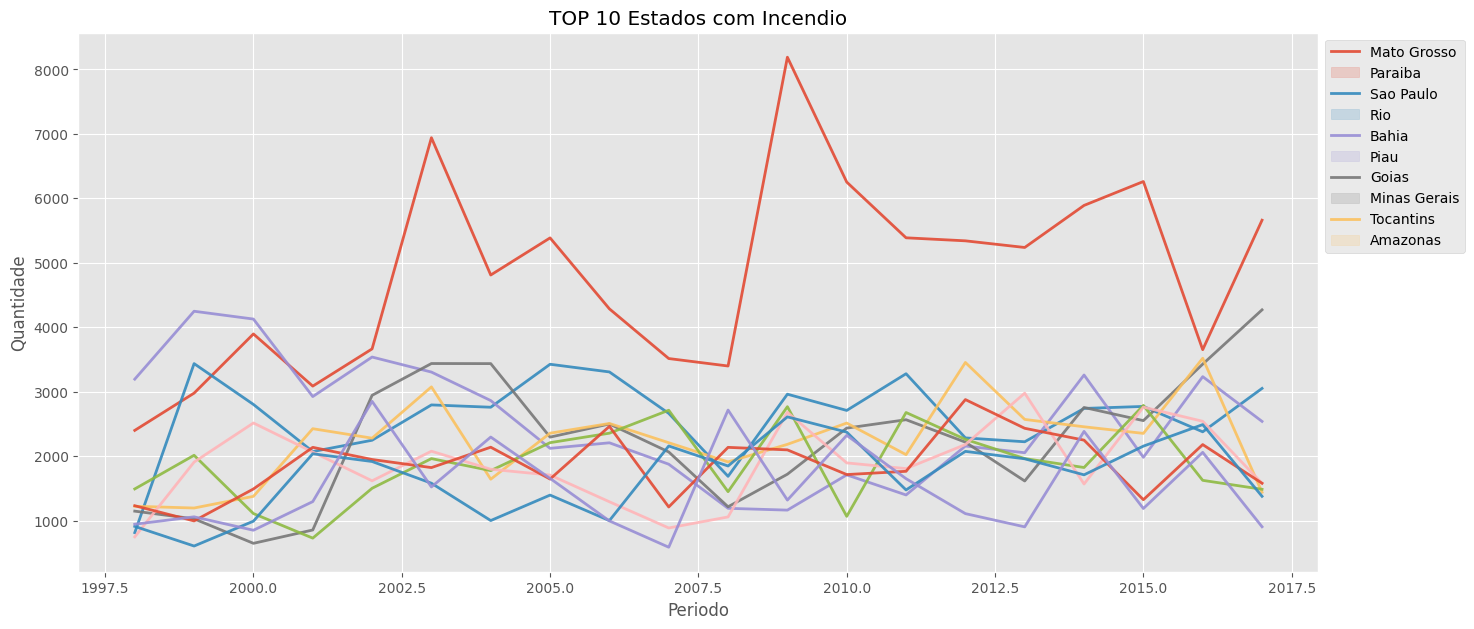

In [13]:
Lista_TOP10 = Analise3['state'][0:10].values

plt.figure(figsize=(16,7))
plt.title('TOP 10 Estados com Incendio')

for Coluna in Lista_TOP10:
  Filtro = BD.loc[BD['state'] == Coluna]
  AnaliseLocal = Filtro.groupby(by=['year']).sum().reset_index()

  sns.lineplot(data=AnaliseLocal, x='year', y='number', lw=2, alpha=0.9)

plt.xlabel('Periodo')
plt.ylabel('Quantidade')

plt.legend(Lista_TOP10, bbox_to_anchor=(1,1));


In [14]:
Estados = Analise3.sort_values('state')['state'].values

Valores = Analise3.sort_values('state')['number'].values

Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Lendo o dicionario
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [16]:
import plotly.express as px

px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='open-street-map'
)